In [12]:
# !pip install google-colab-patches

In [13]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

In [14]:
model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True) # lighter model
model.eval()

/home/balaji/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/balaji/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): FrozenBatchNorm2d(16, eps=1e-05)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
          )
        )
      )
      (2): InvertedResidual(
        (block):

In [15]:
COCO_INSTANCE_CATEGORY_NAMES = [
    "__background__", "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog",
    "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "hat", "backpack", "umbrella",
    "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
    "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
    "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot",
    "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table",
    "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster",
    "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]

len(COCO_INSTANCE_CATEGORY_NAMES)

82

In [16]:
def detect_objects(image_path, confidence_threshold=0.5):
  image = cv2.imread(image_path)

  if image is None:
    print(f"Error: Could not load image from {image_path}. Please check the file path and ensure the image exists.")
    return None

  original_image = image.copy()
  image_tensor = F.to_tensor(image)

  with torch.no_grad():
    predictions = model([image_tensor])

  boxes = predictions[0]['boxes'].numpy()
  labels = predictions[0]['labels'].numpy()
  scores = predictions[0]['scores'].numpy()

  for i, box in enumerate(boxes):
    if scores[i] >= confidence_threshold:
      label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
      score = scores[i]

      start_point = (int(box[0]), int(box[1]))
      end_point = (int(box[2]), int(box[3]))
      cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)
      cv2.putText(original_image, f"{label}: {score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

  return original_image


In [17]:
def show_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

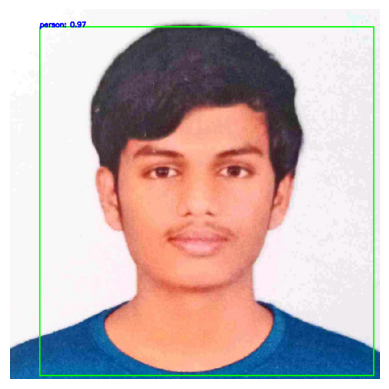

In [18]:
if __name__ == "__main__":
  IMAGE_PATH = "./photo.jpeg"
  show_image(detect_objects(IMAGE_PATH))